# Hortonworks Self-Driving Car

## Project: Draw LiDAR Scan

Raw LiDAR data from the scan will mapped onto a graph using Matplotlib.

In [2]:
import os
import ast
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

## Class for Drawing a Graph of Raw LiDAR Data

In [3]:
class DrawLidarScan():
    def __init__(self, lidar_datafile):
        # LiDAR attributes of the class
        self.filename = lidar_datafile
        # LiDAR data gathered from file stored into string lidar_data list
        self.lidar_data = self.extract_lidar_file_data()
        # LiDAR angle_min extracted from list and converted to float number
        self.angle_min = self.get_lidar_angle_min()
        # LiDAR angle_max extracted from list
        self.angle_max = self.get_lidar_angle_max()
        # LiDAR angle_increment extracted from list
        self.angle_increment = self.get_lidar_angle_increment()
        # LiDAR time_increment extracted from list
        self.time_increment = self.get_lidar_time_increment()
        # LiDAR scan_time extracted from list
        self.scan_time = self.get_lidar_scan_time()
        # LiDAR range_min extracted from list
        self.range_min = self.get_lidar_range_min()
        # LiDAR range_max extracted from list
        self.range_max = self.get_lidar_range_max()
        # LiDAR ranges[] extracted from list
        self.ranges = self.get_lidar_ranges()
        # Filter outliers from original LiDAR ranges[] list into new list
        filtered_ranges = self.preprocess_lidar_ranges()

        # create figure for grid of suplots
        self.fig = plt.figure()
        # select subplot at index 1 of the grid for the current plot
        self.ax1 = self.fig.add_subplot(1,1,1)

        print("Drawing LiDAR Scan")

        self.plot_lidar_scan(filtered_ranges)
        self.show_lidar_scan_plot()

    def extract_lidar_file_data(self):
        """
           LiDAR file has data consisting of key value pairs, some pairs are lists
           Extract the data into list data line by line
        """
        with open(self.filename, "r") as file:
           data = file.readlines()    

        return data

    def get_lidar_angle_min(self):
        """
           Get the lidar angle_min, which is the start angle of the scan [rad]
        """
        angle_min_k, angle_min_v = self.lidar_data[6].split(": ")
        if angle_min_k == "angle_min":
            print("angle_min = %.14f [rad]" %(float(angle_min_v)))
            return float(angle_min_v)
        else:
            msg = "angle_min key not found"
            print(msg)
            return msg

    def get_lidar_angle_max(self):
        """
           Get the lidar angle_max, which is the end angle of the scan [rad]
        """
        angle_max_k, angle_max_v = self.lidar_data[7].split(": ")
        if angle_max_k == "angle_max":
            print("angle_max = %.14f [rad]" %(float(angle_max_v)))
            return float(angle_max_v)
        else:
            msg = "angle_max key not found"
            print(msg)
            return msg

    def get_lidar_angle_increment(self):
        """
           Get the lidar angle_increment, which the angular distance between measurements [rad]
        """
        angle_inc_k, angle_inc_v = self.lidar_data[8].split(": ")
        if angle_inc_k == "angle_increment":
            print("angle_increment = %.14f [rad]" %(float(angle_inc_v)))
            return float(angle_inc_v)
        else:
            msg = "angle_increment key not found"
            print(msg)
            return msg

    def get_lidar_time_increment(self):
        """
           Get the lidar time_increment, which the time between measurements [seconds]
        """
        time_inc_k, time_inc_v = self.lidar_data[9].split(": ")
        if time_inc_k == "time_increment":
            print("time_increment = %.14f [seconds]" %(float(time_inc_v)))
            return float(time_inc_v)
        else:
            msg = "time_increment key not found"
            print(msg)
            return msg
    
    def get_lidar_scan_time(self):
        """
           Get the lidar scan_time, which the time between scans [seconds]
        """
        scan_time_k, scan_time_v = self.lidar_data[10].split(": ")
        if scan_time_k == "scan_time":
            print("scan_time = %.14f [seconds]" %(float(scan_time_v)))
            return float(scan_time_v)
        else:
            msg = "scan_time key not found"
            print(msg)
            return msg

    def get_lidar_range_min(self):
        """
           Get the lidar range_min, which is the minimum range value [m]
        """
        range_min_k, range_min_v = self.lidar_data[11].split(": ")
        if range_min_k == "range_min":
            print("range_min = %.14f [m]" %(float(range_min_v)))
            return float(range_min_v)
        else:
            msg = "range_min key not found"
            print(msg)
            return msg

    def get_lidar_range_max(self):
        """
           Get the lidar range_max, which is the maximum range value [m]
        """
        range_max_k, range_max_v = self.lidar_data[12].split(": ")
        if range_max_k == "range_max":
            print("range_max = %.14f [m]" %(float(range_max_v)))
            return float(range_max_v)
        else:
            msg = "range_max key not found"
            print(msg)
            return msg

    def get_lidar_ranges(self):
        """
           Get the lidar ranges, which is the range data [m]
        """
        # Convert LiDAR ranges string data to key value list pair
        ranges_k, ranges_v = self.lidar_data[13].split(": ")

        if ranges_k == "ranges":
            # Convert string representation of list to list of string range elements
            ranges_list = ast.literal_eval(ranges_v)            
            print("num of elements in ranges_list = %i" %(len(ranges_list)))
            print("data type of ranges_list = %s" %(type(ranges_list)))
            print("ranges_list = %s" %(ranges_list))
            print("data type of ranges_list element[0] = %s" %(type(ranges_list[0])))
            return ranges_list
        else:
            msg = "ranges key not found"
            print(msg)
            return msg

    def preprocess_lidar_ranges(self):
        """
           Remove outliers from ranges[] list and save it as a new list 
           Outliers: values < range_min or values > range_max will be deleted
        """
        new_ranges_list = []
        for range_val in self.ranges:
            if range_val < self.range_min:
                # Do nothing
                print("T when %s < %s" %(range_val, self.range_min))
            elif range_val > self.range_max:
                # Do nothing
                print("T when %s > %s" %(range_val, self.range_max))
            else:
                # Not an outlier, so append range value to new list
                new_ranges_list.append(range_val)
        print("num of elements in lidar_filtered_ranges = %i" %(len(new_ranges_list)))
        print("lidar_filtered_ranges = %s" %(new_ranges_list))
        return new_ranges_list

    def plot_lidar_scan(self, lidar_scan_ranges):
        """
           Draw a graph of the LiDAR scan using the points contained in the ranges list
           Utilizes angle_increment on Z-axis within angle_min and angle_max boundary
           Utilizes ranges list on X-axis, so plot points on (Z, X) plane
        """
        # Set current start angle of scan to angle_inc scan
        angle_inc_scan = self.angle_min
        i = 0
        self.ax1.clear()
        while i < len(lidar_scan_ranges):
            if angle_inc_scan >= self.angle_min and \
            angle_inc_scan < self.angle_max:
                # plot points (Z, X)
                self.ax1.plot(angle_inc_scan, lidar_scan_ranges[i], 'ro')
                angle_inc_scan += self.angle_increment
            i += 1
        self.ax1.set_xlabel('Angle Increment [rad]')
        self.ax1.set_ylabel('Ranges [m]')
        self.ax1.set_title('RC LiDAR Scan')

    def show_lidar_scan_plot(self):
        plt.show()

    def show_animated_lidar_scan(self):
        ani = animation.FuncAnimation(self.fig, self.plot_lidar_scan, interval=1000)

angle_min = -2.35619449615000 [rad]
angle_max = 2.35619449615000 [rad]
angle_increment = 0.00436332309619 [rad]
time_increment = 0.00001736111517 [seconds]
scan_time = 0.02500000037250 [seconds]
range_min = 0.01999999955300 [m]
range_max = 30.00000000000000 [m]
num of elements in ranges_list = 1081
data type of ranges_list = <class 'list'>
ranges_list = [0.15700000524520874, 0.14399999380111694, 0.13099999725818634, 0.13699999451637268, 0.15299999713897705, 0.1599999964237213, 0.17800000309944153, 0.18299999833106995, 0.19900000095367432, 0.21799999475479126, 0.23600000143051147, 0.29600000381469727, 0.29600000381469727, 0.3140000104904175, 0.41100001335144043, 0.4189999997615814, 0.527999997138977, 0.5270000100135803, 0.5450000166893005, 0.5329999923706055, 0.5720000267028809, 0.5759999752044678, 0.578000009059906, 0.574999988079071, 0.5730000138282776, 0.5730000138282776, 0.5609999895095825, 0.5630000233650208, 0.5669999718666077, 0.5789999961853027, 0.5879999995231628, 0.58700001239

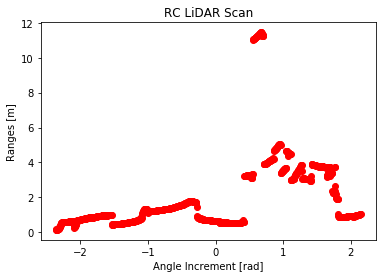

In [4]:
base_dir = "test_raw_lidar/"
lidar_filepath = ase_dir+"lidar-08-38-40.txt"
DrawLidarScan(lidar_filepath)